In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
base_dir = os.getcwd()
data_path = os.path.join(base_dir, '..', 'data', 'Dataset.csv')
df = pd.read_csv(data_path)

In [91]:
df = pd.read_csv(data_path)
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


UDI and Product_ID seems irrelevant


In [92]:
columns_to_drop = ['UDI', 'Product ID', 'TWF', 'HDF', 'OSF', 'PWF', 'RNF']
df = df.drop(columns=columns_to_drop)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


No null values present


In [94]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [95]:
df['Machine failure'].value_counts(normalize=True)

Machine failure
0    0.9661
1    0.0339
Name: proportion, dtype: float64

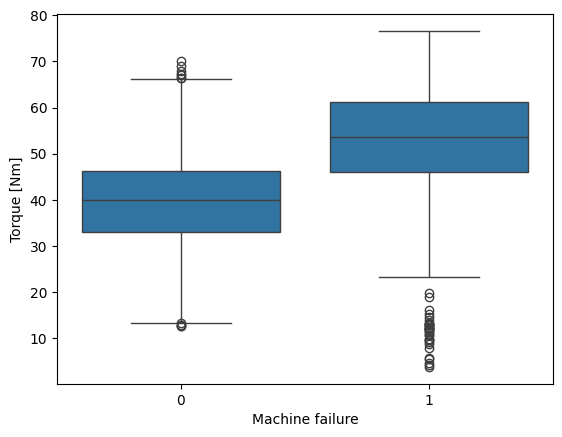

In [96]:
sns.boxplot(x='Machine failure', y='Torque [Nm]', data=df)
plt.show()

The Median Value of Torque for failure is much higher 

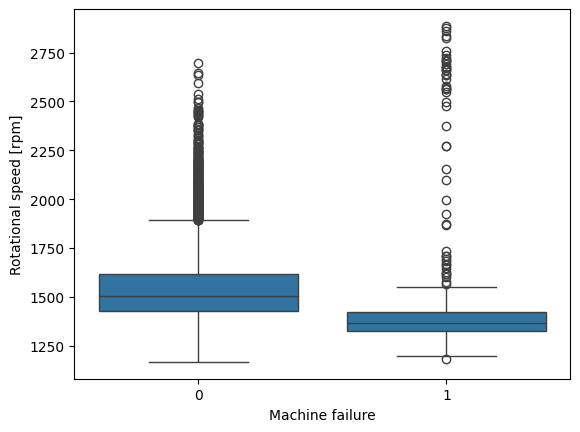

In [97]:
sns.boxplot(x='Machine failure', y='Rotational speed [rpm]', data=df)
plt.show()

The Median Value of Rotational speed of failure is lower 


In [98]:
df['Power'] = (df['Torque [Nm]'] * df['Rotational speed [rpm]'] * (2 * np.pi)) / 60
df['Temp_Diff'] = df['Process temperature [K]'] - df['Air temperature [K]']
df['Wear_Stress'] = df['Tool wear [min]'] * df['Torque [Nm]']

In [99]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,Power,Temp_Diff,Wear_Stress
0,M,298.1,308.6,1551,42.8,0,0,6951.590560,10.5,0.0
1,L,298.2,308.7,1408,46.3,3,0,6826.722724,10.5,138.9
2,L,298.1,308.5,1498,49.4,5,0,7749.387543,10.4,247.0
3,L,298.2,308.6,1433,39.5,7,0,5927.504659,10.4,276.5
4,L,298.2,308.7,1408,40.0,9,0,5897.816608,10.5,360.0


In [100]:
type_mapping = { 'L': 0, 'M': 1, 'H': 2 }
df['Type'] = df['Type'].map(type_mapping)
df.corr()['Machine failure'].sort_values(ascending=False)

Machine failure            1.000000
Torque [Nm]                0.191321
Wear_Stress                0.190427
Power                      0.176039
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [K]    0.035946
Type                      -0.036715
Rotational speed [rpm]    -0.044188
Temp_Diff                 -0.111676
Name: Machine failure, dtype: float64

Using Label Encoder since Type is an order of Rankings, where low quality machine breaks often compared to high quality one.

In [101]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Machine failure'])
y = df['Machine failure']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [102]:
print(x_test.shape, x_train.shape)
print(y_train.value_counts(normalize=True))

(2000, 9) (8000, 9)
Machine failure
0    0.966125
1    0.033875
Name: proportion, dtype: float64


The test and train split is perfect because of stratify and the matches the original value

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [104]:
from xgboost import XGBClassifier
ratio = (y_train == 0).sum() / (y_train == 1).sum()
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    scale_pos_weight=ratio,
    random_state=42,
)
model.fit(x_train_scaled, y_train)
y_probs = model.predict_proba(x_test_scaled)[:, 1]

custom_threshold = 0.15
y_pred = (y_probs >= custom_threshold).astype(int)


              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1932
           1       0.42      0.88      0.57        68

    accuracy                           0.95      2000
   macro avg       0.71      0.92      0.77      2000
weighted avg       0.98      0.95      0.96      2000



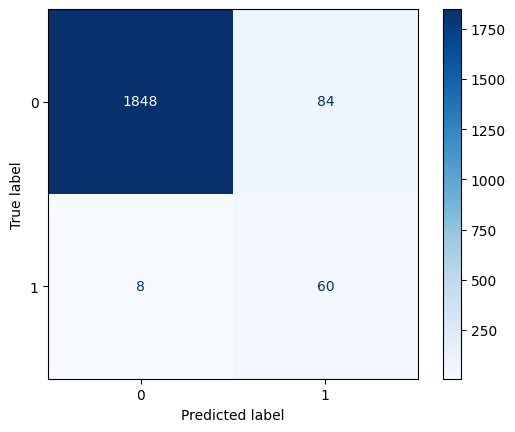

In [105]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot(cmap='Blues')
plt.show()

The model seemed to have marked False Negative twice. Resulting in dropping of Recall parameter. But still these are very good numbers. 

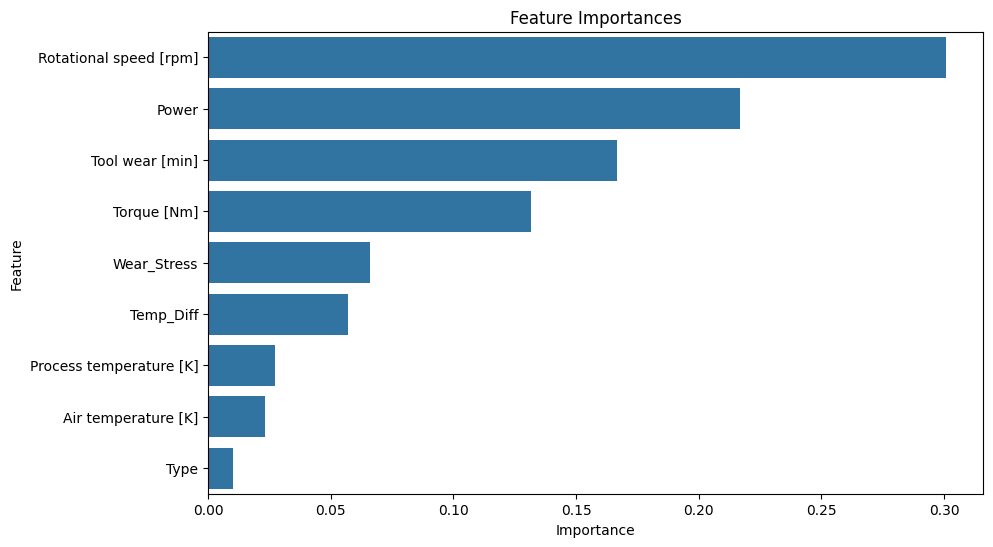

In [106]:
importances = model.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

The Rotational Speed, PWF, total wear seemed to have played a huge role in this.

In [107]:
results = x_test.copy()
results['Actual'] = y_test
results['Predicted'] = y_pred
false_negatives = results[(results['Actual'] == 1) & (results['Predicted'] == 0)]
false_negatives

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Power,Temp_Diff,Wear_Stress,Actual,Predicted
9174,0,297.8,308.9,1871,25.6,200,5015.824943,11.1,5120.0,1,0
2864,2,300.6,309.4,1380,47.6,246,6878.831274,8.8,11709.6,1,0
2941,1,300.7,309.6,1996,19.8,203,4138.608498,8.9,4019.4,1,0
9015,0,297.2,308.1,1431,49.7,210,7447.742288,10.9,10437.0,1,0
7849,1,300.3,311.7,1374,47.9,222,6892.088795,11.4,10633.8,1,0
8506,0,298.4,309.6,1710,27.3,163,4888.632328,11.2,4449.9,1,0
1996,1,298.4,308.0,1416,38.2,198,5664.417218,9.6,7563.6,1,0
4034,0,302.0,310.8,1615,29.0,235,4904.549731,8.8,6815.0,1,0
